In [150]:
import pandas as pd
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import datetime
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


ModuleNotFoundError: No module named 'tensorflow'

In [127]:
dbmf_df = pd.read_csv("/Users/CAM/Desktop/DBMF_Time_Series_Predictions/Data/HistoricalData_1664150906387.csv").dropna()

In [128]:
dbmf_df

,Date,Close/Last,Volume,Open,High,Low
0,09/23/2022,33.8400,1335332.0,33.6900,33.9500,33.6000
1,09/22/2022,33.4700,996129.0,33.3300,33.6100,33.2508
2,09/21/2022,33.4000,1030096.0,33.2700,33.6600,33.1000
3,09/20/2022,33.2200,877852.0,33.1200,33.4900,33.1200
4,09/19/2022,32.9900,445331.0,32.9800,33.2887,32.6700
...,...,...,...,...,...,...
848,05/14/2019,24.9824,216.0,24.9600,25.0000,24.9600
849,05/13/2019,24.8395,20.0,24.8395,24.8395,24.8395
850,05/10/2019,25.0226,109.0,25.0226,25.0226,25.0226
851,05/09/2019,25.0193,600.0,25.0200,25.0200,24.9400


In [129]:
dbmf_df=dbmf_df[['Date','Close/Last']]

In [69]:
dbmf_df.tail()

,Date,Close/Last
848,05/14/2019,24.9824
849,05/13/2019,24.8395
850,05/10/2019,25.0226
851,05/09/2019,25.0193
852,05/08/2019,25.0050


In [70]:
dbmf_df.tail()

,Date,Close/Last
848,05/14/2019,24.9824
849,05/13/2019,24.8395
850,05/10/2019,25.0226
851,05/09/2019,25.0193
852,05/08/2019,25.0050


In [136]:
import datetime

dbmf_df.loc[:,'Date'] = pd.to_datetime(dbmf_df.loc[:,'Date'])

/var/folders/51/sjwdb3gd3pnc3vwyv88dqrrr0000gn/T/ipykernel_10933/805217906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbmf_df.loc[:,'Date'] = pd.to_datetime(dbmf_df.loc[:,'Date'])


In [137]:
dbmf_df['Date']

0     2022-09-23
1     2022-09-22
2     2022-09-21
3     2022-09-20
4     2022-09-19
         ...    
848   2019-05-14
849   2019-05-13
850   2019-05-10
851   2019-05-09
852   2019-05-08
Name: Date, Length: 826, dtype: datetime64[ns]

In [138]:
dbmf_df.index = dbmf_df.pop('Date')
dbmf_df

,Close/Last
Date,
2022-09-23,33.8400
2022-09-22,33.4700
2022-09-21,33.4000
2022-09-20,33.2200
2022-09-19,32.9900
...,...
2019-05-14,24.9824
2019-05-13,24.8395
2019-05-10,25.0226


In [139]:
dbmf_df

,Close/Last
Date,
2022-09-23,33.8400
2022-09-22,33.4700
2022-09-21,33.4000
2022-09-20,33.2200
2022-09-19,32.9900
...,...
2019-05-14,24.9824
2019-05-13,24.8395
2019-05-10,25.0226


In [140]:
import matplotlib.pyplot as plt

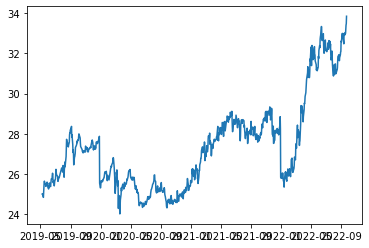

In [141]:
plt.plot(dbmf_df)

In [142]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [143]:
scaler = MinMaxScaler(feature_range=(0,1))

In [144]:
dbmf_df =scaler.fit_transform(np.array(dbmf_df).reshape(-1,1))

In [145]:
dbmf_df

array([[1.        ],
       [0.96233215],
       [0.9552058 ],
       [0.9368809 ],
       [0.91346575],
       [0.90532135],
       [0.91550185],
       [0.90735745],
       [0.91142965],
       [0.86052715],
       [0.8920867 ],
       [0.90328525],
       [0.8900506 ],
       [0.91346575],
       [0.87070765],
       [0.8737618 ],
       [0.82184125],
       [0.8187871 ],
       [0.80453439],
       [0.79028169],
       [0.77501094],
       [0.80249829],
       [0.80555244],
       [0.80249829],
       [0.79537194],
       [0.76584849],
       [0.73836114],
       [0.72919869],
       [0.72614454],
       [0.71290989],
       [0.72919869],
       [0.70781964],
       [0.75872214],
       [0.75872214],
       [0.74141529],
       [0.70476549],
       [0.75363189],
       [0.73530699],
       [0.69763914],
       [0.73530699],
       [0.75363189],
       [0.78926364],
       [0.82387735],
       [0.79435389],
       [0.77908314],
       [0.81166075],
       [0.8595091 ],
       [0.844

In [146]:
#Train,test, split dataset
training_size = int(len(dbmf_df)*0.33)
test_size = len(dbmf_df) - training_size


In [147]:
test_size

554

In [148]:
training_size

272

In [149]:
dbmf_df.shape

(826, 1)